# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.132145e+01     7.527556e+00
 * time: 0.00426793098449707
     1     3.066325e+01     4.558882e+00
 * time: 0.01966094970703125
     2     2.211215e+01     4.788137e+00
 * time: 0.03868293762207031
     3     1.679528e+01     4.262642e+00
 * time: 0.058400869369506836
     4     1.215612e+01     2.371172e+00
 * time: 0.07813096046447754
     5     1.024354e+01     1.137474e+00
 * time: 0.09774088859558105
     6     9.832158e+00     1.803878e+00
 * time: 0.11377501487731934
     7     9.286762e+00     1.200762e+00
 * time: 0.1300678253173828
     8     8.801070e+00     1.198113e+00
 * time: 0.14536285400390625
     9     8.558014e+00     7.406025e-01
 * time: 0.1607809066772461
    10     8.520617e+00     1.182064e+00
 * time: 0.17219090461730957
    11     8.319105e+00     7.528451e-01
 * time: 0.18764686584472656
    12     8.201776e+00     6.679641e-01
 * time: 0.20333385467529297
    13     8.117205e+00     5.960567e-01
 * time: 

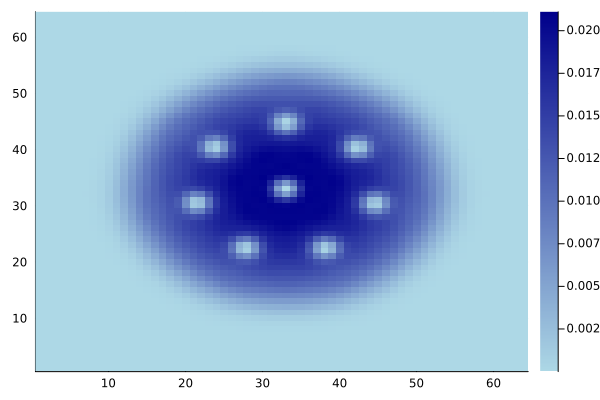

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)